In [ ]:
# Fake News Detection using ML - Google Colab Code

# Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Step 2: Load datasets (upload both CSVs in Colab)
fake_df = pd.read_csv("Fake.csv")
true_df = pd.read_csv("True.csv")

In [ ]:
# Step 3: Add labels
fake_df['label'] = 0
true_df['label'] = 1

In [ ]:
# Step 4: Combine and shuffle data
df = pd.concat([fake_df, true_df], ignore_index=True)
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
# Step 5: Preprocess text (optional: more cleaning can be added)
df['text'] = df['title'] + " " + df['text']  # Combine title and body
X = df['text']
y = df['label']

In [ ]:
# Step 6: Split and vectorize
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
# Step 7: Train model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

Accuracy: 0.9860801781737194

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4678
           1       0.98      0.99      0.99      4302

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



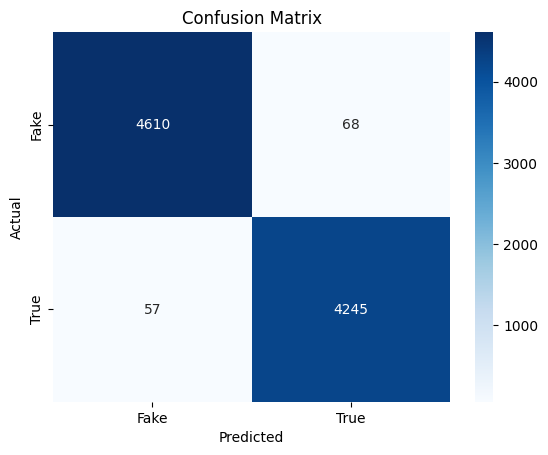

In [ ]:
# Step 8: Evaluate
y_pred = model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 9: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Step 10: Predict on new input
def predict_news(text):
    """Predicts if the given text is fake or true news."""
    # Preprocess and vectorize the input text
    text_tfidf = tfidf.transform([text])

    # Make prediction
    prediction = model.predict(text_tfidf)

    # Return prediction label
    if prediction[0] == 0:
        return "Fake News"
    else:
        return "True News"

# Example usage:
input_news = input("Enter the news text to predict: ")
prediction = predict_news(input_news)
print(f"The news is predicted as: {prediction}")